In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import scipy.stats

from numpy.linalg import norm

import matplotlib.pyplot as plt

In [2]:
DATAPATH='data/'

In [3]:
data = pd.read_csv(DATAPATH+'cleaned_unique_index.csv',low_memory=False)

In [4]:
data.set_index('code',inplace =True)

In [ ]:
# data=data.sample(int(len(data) * .1))

In [5]:
data_labels=data.labels_en.dropna().str.split(',')
data_labels_exploded=data_labels.apply(pd.Series).unstack().dropna()

In [6]:
data_categories=data.categories_en.dropna().str.split(',')
data_categories_exploded=data_categories.apply(pd.Series).unstack().dropna()

In [7]:
data_categories_exploded.head()

   code         
0  0000000001281                               Pies
   0000000001885    Plant-based foods and beverages
   0000000005470    Plant-based foods and beverages
   0000000005661                            Seafood
   0000000020114                Dietary supplements
dtype: object

In [8]:
data_origins=data.origins.dropna().str.split(',')
data_origins_exploded=data_origins.apply(pd.Series).unstack().dropna()

In [10]:
data_origins_exploded=data_origins_exploded.map(lambda x: x.lstrip(' (').rstrip(' ).¨'))


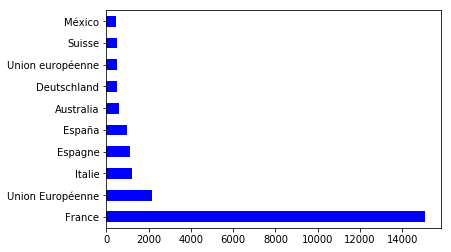

In [11]:
data_origins_exploded.value_counts().head(10).plot(kind='barh',color='b')

In [12]:
#origin translation
data_origins_exploded[data_origins_exploded=='Germany']='Allemagne'
data_origins_exploded[data_origins_exploded=='Deutschland']='Allemagne'
data_origins_exploded[data_origins_exploded=='Germany']='Allemagne'
data_origins_exploded[data_origins_exploded=='Alemania']='Allemagne'


data_origins_exploded[data_origins_exploded=='Spain']='Espagne'
data_origins_exploded[data_origins_exploded=='Spanien']='Espagne'
data_origins_exploded[data_origins_exploded=='España']='Espagne'
data_origins_exploded[data_origins_exploded=='Espana']='Espagne'
data_origins_exploded[data_origins_exploded=='Espanha']='Espagne'
data_origins_exploded[data_origins_exploded=='Ispanija']='Espagne'


data_origins_exploded[data_origins_exploded=='Hungary']='Hongrie'
data_origins_exploded[data_origins_exploded=='Ungarn']='Hongrie'
data_origins_exploded[data_origins_exploded=='Ungaria']='Hongrie'
data_origins_exploded[data_origins_exploded=='Ungheria']='Hongrie'

data_origins_exploded[data_origins_exploded=='Austria']='Autriche'
data_origins_exploded[data_origins_exploded=='Österreich']='Autriche'

data_origins_exploded[data_origins_exploded=='Frankreich']='France'
data_origins_exploded[data_origins_exploded=='Frankrijk']='France'
data_origins_exploded[data_origins_exploded=='Francia']='France'
data_origins_exploded[data_origins_exploded=='França']='France'

data_origins_exploded[data_origins_exploded=='Italia']='Italie'
data_origins_exploded[data_origins_exploded=='Italië']='Italie'
data_origins_exploded[data_origins_exploded=='Italy']='Italie'
data_origins_exploded[data_origins_exploded=='Italien']='Italie'
data_origins_exploded[data_origins_exploded=='Itália']='Italie'
data_origins_exploded[data_origins_exploded=='Itali']='Italie'


data_origins_exploded[data_origins_exploded=='Suiza']='Suisse'
data_origins_exploded[data_origins_exploded=='Schweiz']='Suisse'
data_origins_exploded[data_origins_exploded=='Switzerland']='Suisse'
data_origins_exploded[data_origins_exploded=='Switzerlandi']='Suisse'
data_origins_exploded[data_origins_exploded=='Switzerlandi']='Suisse'

data_origins_exploded[data_origins_exploded=='Belgium']='Belgique'
data_origins_exploded[data_origins_exploded=='Belgica']='Belgique'
data_origins_exploded[data_origins_exploded=='België']='Belgique'



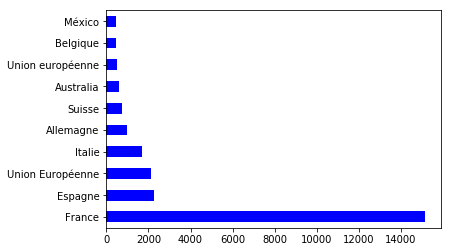

In [13]:
data_origins_exploded.value_counts().head(10).plot(kind='barh',color='b')

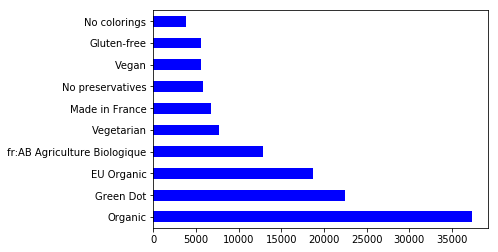

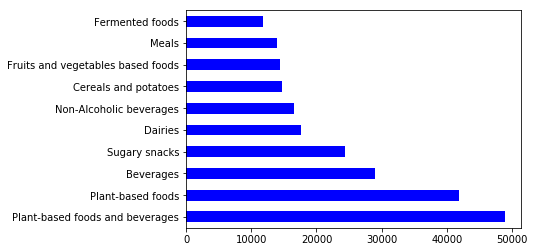

In [14]:
data_labels_exploded.value_counts().head(10).plot(kind='barh',color='b')
plt.show()
data_categories_exploded.value_counts().head(10).plot(kind='barh',color='b')
plt.show()

In [15]:
z=pd.DataFrame(data_labels_exploded).reset_index().set_index("code")[[0]]
z.columns=['label']
x=pd.DataFrame(data_categories_exploded).reset_index().set_index('code')[[0]]
x.columns=['category']

In [24]:
z=pd.DataFrame(data_labels_exploded).reset_index().set_index("code")[[0]]
z.columns=['label']
x=pd.DataFrame(data_categories_exploded).reset_index().set_index('code')[[0]]
x.columns=['category']
origins_=pd.DataFrame(data_origins_exploded).reset_index().set_index("code")[[0]]
origins_.columns=['origin']

f=x.join(z).dropna()
f['joined']=f['category']+','+f['label']

highest_support=pd.Series(f['joined'].value_counts().head(50).index.values)

grouped_=list(zip(*(highest_support.str.split(',').values)))
highest_categories=np.unique(list(grouped_[0]))
highest_labels=np.unique(list(grouped_[1]))
highest_categories=highest_categories.tolist()
highest_labels=highest_labels.tolist()



In [63]:
def cosine_similarity(array1,array2):
    return np.divide(np.dot(array1,array2),norm(array1)*norm(array2))


In [81]:
def pearson_similarity(array1,array2,delta=1e-14):
    array1_=np.subtract(array1,np.mean(array1))
    array2_=np.subtract(array2,np.mean(array2))
    return np.divide(np.dot(array1_,array2_),norm(array1_)*norm(array2_))

In [86]:
cosine_similarity(np.array([1,0,3]),np.array([1,2,3]))

0.8451542547285166

In [87]:
pearson_similarity(np.array([1,0,3]),np.array([1,2,3]))

0.654653670707977

In [100]:
def define_local_rules(origin=None):

    origins_=pd.DataFrame(data_origins_exploded).reset_index().set_index("code")[[0]]
    origins_.columns=['origin']
    x_=x.copy()
    z_=z.copy()
    if origin:

        origins_=origins_[origins_['origin']==origin]
        z_=z.join(origins_).dropna().drop(columns=['origin'])
        x_=x.join(origins_).dropna().drop(columns=['origin'])



    f=x_.join(z_).dropna()
    f['joined']=f['category']+','+f['label']
    support=f['joined'].value_counts()
    label_counts=f['label'].value_counts()
    category_counts=f['category'].value_counts()

    for label in highest_labels:

        for category in highest_categories:


            string_=category+','+label
            if string_ in support.index:
                local_rules[label+' -> '+category]=support.loc[category+','+label]/label_counts.loc[label]
                local_rules[category+' -> '+label]=support.loc[category+','+label]/category_counts.loc[category]
            else:
                local_rules[label+' -> '+category]=0.
                local_rules[category+' -> '+label]=0.
    return local_rules.copy()


In [101]:
general_local_rules=define_local_rules()
germany_local_rules=define_local_rules('Allemagne')
france_local_rules=define_local_rules('France')
belgium_local_rules=define_local_rules('Belgique')
spain_local_rules=define_local_rules('Espagne')
italy_local_rules=define_local_rules('Italie')
switzerland_local_rules=define_local_rules('Suisse')

In [102]:
values=np.zeros((7,len(general_local_rules)))
values[0]=list(general_local_rules.values())
values[1]=list(germany_local_rules.values())
values[2]=list(france_local_rules.values())
values[3]=list(belgium_local_rules.values())
values[4]=list(spain_local_rules.values())
values[5]=list(italy_local_rules.values())
values[6]=list(switzerland_local_rules.values())

In [103]:
cosine_similarities = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        cosine_similarities[i,j]=cosine_similarity(values[i],values[j])

In [104]:
cosine_similarity_frame=pd.DataFrame(cosine_similarities)
cosine_similarity_frame.columns=['World','Germany','France','Belgium','Spain','Italy','Switzerland']
cosine_similarity_frame.index=['World','Germany','France','Belgium','Spain','Italy','Switzerland']


In [105]:
pearson_similarities = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        pearson_similarities[i,j]=pearson_similarity(values[i],values[j])

In [106]:
pearson_similarity_frame=pd.DataFrame(pearson_similarities)
pearson_similarity_frame.columns=['World','Germany','France','Belgium','Spain','Italy','Switzerland']
pearson_similarity_frame.index=['World','Germany','France','Belgium','Spain','Italy','Switzerland']

In [107]:
print('Cosine similarities')
cosine_similarity_frame

Cosine similarities


,World,Germany,France,Belgium,Spain,Italy,Switzerland
World,1.000000,0.771740,0.944963,0.716063,0.807763,0.886429,0.666894
Germany,0.771740,1.000000,0.697172,0.586071,0.686856,0.857461,0.649257
France,0.944963,0.697172,1.000000,0.713833,0.689793,0.808039,0.602875
Belgium,0.716063,0.586071,0.713833,1.000000,0.531277,0.586176,0.394185
Spain,0.807763,0.686856,0.689793,0.531277,1.000000,0.752514,0.577620
Italy,0.886429,0.857461,0.808039,0.586176,0.752514,1.000000,0.746131
Switzerland,0.666894,0.649257,0.602875,0.394185,0.577620,0.746131,1.000000


In [108]:
print('Linear correlation similariteis')
pearson_similarity_frame

Linear correlation similariteis


,World,Germany,France,Belgium,Spain,Italy,Switzerland
World,1.000000,0.688096,0.914618,0.632691,0.717121,0.836118,0.553199
Germany,0.688096,1.000000,0.583581,0.477778,0.578213,0.809910,0.551713
France,0.914618,0.583581,1.000000,0.629801,0.545991,0.721381,0.466515
Belgium,0.632691,0.477778,0.629801,1.000000,0.391791,0.465140,0.246512
Spain,0.717121,0.578213,0.545991,0.391791,1.000000,0.651275,0.443643
Italy,0.836118,0.809910,0.721381,0.465140,0.651275,1.000000,0.668764
Switzerland,0.553199,0.551713,0.466515,0.246512,0.443643,0.668764,1.000000


# Local Rule Analysis

In [25]:
support=f['joined'].value_counts()
label_counts=f['label'].value_counts()
category_counts=f['category'].value_counts()
category_counts.loc['Beverages']

35792

In [26]:
local_rules={}
i=0
for label in highest_labels:

    for category in highest_categories:
        i+=1
        
        string_=category+','+label
        if string_ in support.index:
            local_rules[label+' -> '+category]=support.loc[category+','+label]/label_counts.loc[label]
            local_rules[category+' -> '+label]=support.loc[category+','+label]/category_counts.loc[category]
        else:
            local_rules[label+' -> '+category]=0.
            local_rules[category+' -> '+label]=0.
        

In [27]:
local_rules

{'EU Organic -> Alcoholic beverages': 0.0040770208558919075,
 'Alcoholic beverages -> EU Organic': 0.045492750577852493,
 'EU Organic -> Beverages': 0.02190104044065722,
 'Beverages -> EU Organic': 0.0649865891819401,
 'EU Organic -> Biscuits and cakes': 0.008135210206675769,
 'Biscuits and cakes -> EU Organic': 0.05392585195356385,
 'EU Organic -> Breakfasts': 0.014792147262369945,
 'Breakfasts -> EU Organic': 0.11486437084155882,
 'EU Organic -> Cereals and potatoes': 0.024951744268160634,
 'Cereals and potatoes -> EU Organic': 0.09960533734260478,
 'EU Organic -> Cereals and their products': 0.02049809331010781,
 'Cereals and their products -> EU Organic': 0.11441034265293253,
 'EU Organic -> Dairies': 0.014537921943411327,
 'Dairies -> EU Organic': 0.06111704864822072,
 'EU Organic -> Desserts': 0.007353702744691869,
 'Desserts -> EU Organic': 0.0494742176612188,
 'EU Organic -> Fermented foods': 0.010027776470034368,
 'Fermented foods -> EU Organic': 0.0622952737482452,
 'EU Organ

In [ ]:
for elm in f['label'].head():
    print(elm)

In [ ]:
len(f['label'])*len(f['category'])

In [ ]:
local_rules